In [56]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [87]:
# Load the dataset
df = pd.read_csv('car_evaluation.csv', names=['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety', 'Evaluation'])

In [88]:
# Explore the data
print(df.head())

   Price Maintenance Doors Passengers Luggage Safety Evaluation
0  vhigh       vhigh     2          2   small    low      unacc
1  vhigh       vhigh     2          2   small    med      unacc
2  vhigh       vhigh     2          2   small   high      unacc
3  vhigh       vhigh     2          2     med    low      unacc
4  vhigh       vhigh     2          2     med    med      unacc


In [89]:
# Explore the data
print(df.tail())

     Price Maintenance  Doors Passengers Luggage Safety Evaluation
1723   low         low  5more       more     med    med       good
1724   low         low  5more       more     med   high      vgood
1725   low         low  5more       more     big    low      unacc
1726   low         low  5more       more     big    med       good
1727   low         low  5more       more     big   high      vgood


In [90]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Price        1728 non-null   object
 1   Maintenance  1728 non-null   object
 2   Doors        1728 non-null   object
 3   Passengers   1728 non-null   object
 4   Luggage      1728 non-null   object
 5   Safety       1728 non-null   object
 6   Evaluation   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [91]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1728, 7)


In [85]:
print(df.columns)

Index(['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety',
       'Evaluation', 'Cluster'],
      dtype='object')


In [92]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Price          0
Maintenance    0
Doors          0
Passengers     0
Luggage        0
Safety         0
Evaluation     0
dtype: int64


In [93]:
# Preprocess the dataset
# Handle missing values if any
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

print(f"Cleaned dataset shape: {df.shape}")

Cleaned dataset shape: (1728, 7)


In [63]:
# # Save the cleaned and clustered dataset to a new CSV file
df.to_csv('car_evaluation_cleaned.csv', index=False)

In [64]:
# Encode categorical variables
label_encoders = {}

In [65]:
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [66]:
# Select relevant columns for modeling
X = df[['Price', 'Maintenance', 'Doors', 'Passengers', 'Luggage', 'Safety']]

In [67]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
# Select an unsupervised machine learning model (KMeans clustering)
kmeans = KMeans(n_clusters=4, random_state=42)

In [69]:
# Build the model
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [70]:
# Assign cluster labels to the data points
df['Cluster'] = kmeans.labels_

In [71]:
# Display the cluster centers
print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X.columns))


Cluster Centers:
          Price  Maintenance     Doors  Passengers  Luggage    Safety
0  1.227156e-17    -0.894427  0.838525    0.344459  0.00000 -0.344459
1 -2.981424e-02     0.983870  0.745356   -0.097980 -0.01633  0.097980
2  2.981424e-02     0.387585 -0.971944    0.457238  0.01633 -0.457238
3  6.582920e-18    -0.616430 -0.495561   -0.662024  0.00000  0.662024


In [72]:
# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [73]:
# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

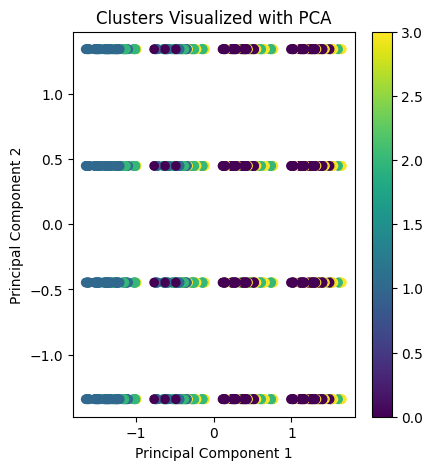

In [74]:
# Visualize clusters using PCA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

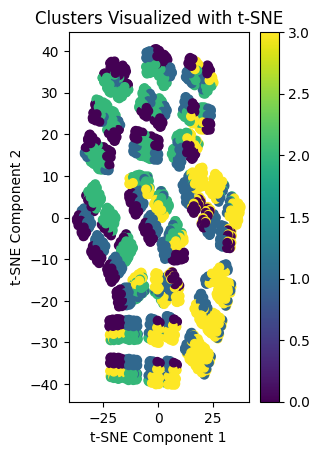

In [75]:
# Visualize clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters Visualized with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()

In [76]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [77]:
# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.11467832171454509


In [78]:
# Make two new records with reasonable values
new_records = pd.DataFrame({
    'Price': ['vhigh', 'vhigh'],
    'Maintenance': ['vhigh', 'vhigh'],
    'Doors': [2, 2],
    'Passengers': [2, 2],
    'Luggage': ['small', 'small'],
    'Safety': ['low', 'med']
})

In [79]:
# Encode categorical variables in new records
for col in new_records.select_dtypes(include=['object']).columns:
    if col in label_encoders:
        new_records[col] = label_encoders[col].transform(new_records[col])

In [80]:
# Feature scaling for new records
new_records_scaled = scaler.transform(new_records)

In [81]:
predicted_clusters = kmeans.predict(new_records_scaled)
print("\nPredicted Clusters for New Records:")
print(predicted_clusters)


Predicted Clusters for New Records:
[1 1]


In [82]:
# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f"\nSilhouette Score: {silhouette_avg}")


Silhouette Score: 0.11467832171454509


Predicted Clusters for New Records:
The predicted clusters for the new records are [1 1].
This means that both new records were assigned to cluster 1 by the KMeans clustering algorithm.

Silhouette Score:
The silhouette score of approximately 0.115 indicates the quality of the clustering.
A higher silhouette score suggests better-defined clusters where data points are closer to their own cluster and farther from other clusters.
In this case, the relatively low silhouette score suggests that the clusters might not be well-separated or distinct.